## Сравнение линейной и логистической регрессии в задачах классификации

### 1. Предпроцессинг

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics

1.1 Загрузим данные

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/single_grade.csv")
df.sort_values(by=["grade", "qualifies"], inplace=True)

2.1 Посмотрим на данные

In [60]:
len(df)

40

In [6]:
df.head()

,grade,qualifies
8,31,0
18,33,0
33,33,0
10,34,0
30,34,0


In [7]:
X = df[["grade"]]
y = df["qualifies"]


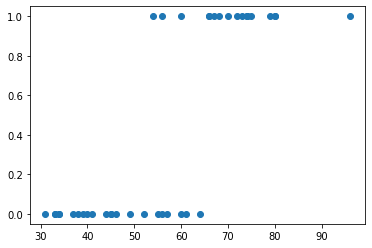

In [8]:
plt.scatter(X, y)

### 2. Обучения

2.1 Построим  логистическую регрессию.

In [9]:
df_model = sk_linear_models.LogisticRegression()
df_model.fit(X, y)

LogisticRegression()

2.2 Получим предсказания 

In [26]:
Logistic_predict=df_model.predict(X)
df_model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

 2.3 Вероятность

In [27]:
Logistic_predict_proba=df_model.predict_proba(X)[:, 1]
df_model.predict_proba(X)[:, 1]

array([3.39571289e-04, 5.89635451e-04, 5.89635451e-04, 7.76931675e-04,
       7.76931675e-04, 1.77660154e-03, 2.34005177e-03, 3.08164889e-03,
       4.05731335e-03, 5.34022305e-03, 1.21400958e-02, 1.59378567e-02,
       1.59378567e-02, 2.08985297e-02, 4.65815050e-02, 1.00584742e-01,
       1.62645638e-01, 2.03811868e-01, 2.52258537e-01, 2.52258537e-01,
       3.07769597e-01, 5.04384562e-01, 5.04384562e-01, 5.72870898e-01,
       7.54300239e-01, 8.42075275e-01, 8.42075275e-01, 8.75423337e-01,
       9.02544458e-01, 9.41469413e-01, 9.65442540e-01, 9.73557865e-01,
       9.79807282e-01, 9.79807282e-01, 9.79807282e-01, 9.84603052e-01,
       9.94842902e-01, 9.96081992e-01, 9.96081992e-01, 9.99952504e-01])

 2.4 Построим линейную регрессию.

In [15]:
df_model_Linear = sk_linear_models.LinearRegression()
df_model_Linear.fit(X, y)

LinearRegression()

2.5 Получим предсказания

In [28]:
Linear_predict=df_model_Linear.predict(X)
df_model_Linear.predict(X)

array([-0.18574173, -0.13674429, -0.13674429, -0.11224557, -0.11224557,
       -0.03874942, -0.0142507 ,  0.01024802,  0.03474673,  0.05924545,
        0.1327416 ,  0.15724032,  0.15724032,  0.18173904,  0.25523519,
        0.32873135,  0.37772878,  0.4022275 ,  0.42672622,  0.42672622,
        0.45122494,  0.52472109,  0.52472109,  0.54921981,  0.62271596,
        0.6717134 ,  0.6717134 ,  0.69621211,  0.72071083,  0.76970827,
        0.8187057 ,  0.84320442,  0.86770314,  0.86770314,  0.86770314,
        0.89220186,  0.99019673,  1.01469545,  1.01469545,  1.40667493])

### 3. Визуализация результатов

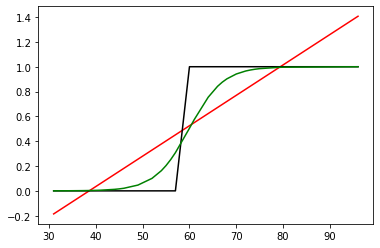

In [20]:
plt.plot(X, df_model_Linear.predict(X), color="r")
plt.plot(X, df_model.predict(X), color="k")
plt.plot(X, df_model.predict_proba(X)[:, 1], color="g")

### 4. Сравнение линейной и логистической регрессии

4.1 Преобразуем результат линнейной модели в логику с границей 0.5

In [29]:
Linear=[]
for elm in Linear_predict:
    if elm>0.5:
        Linear.append(1)
    else:
        Linear.append(0)
        


4.2 Сравним результаты предсказания двух моделей . Если при сравнении двух массивов обнаружится несовпадения . Код выведит результат несовпадения 

In [63]:
for k in range(len(X)):
    if Logistic_predict[k] != Linear[k]:
        print (k)

4.3 Вывод. Код не вывел ни одного элемента . Модели идентичны если использовать преобразования для линейно модели.

### 5. Метрики качества

5.1 Матрица ошибок

In [32]:
sk_metrics.confusion_matrix(y,Logistic_predict)

array([[19,  3],
       [ 2, 16]], dtype=int64)

5.2 Точность LogisticRegression()

In [58]:
sk_metrics.accuracy_score(Logistic_predict, y)

0.875

5.3 Уровень ошибки 

In [50]:
1-sk_metrics.accuracy_score(Logistic_predict, y)

0.125

5.4 Меткость для   LogisticRegression()

In [61]:
sk_metrics.precision_score(Logistic_predict, y)

0.8888888888888888

5.5 Чувствительность  для LogisticRegression()

In [59]:
sk_metrics.recall_score(Logistic_predict, y)

0.8421052631578947